Для себя я выбрала следующие пункты, которые хочу проанализировать:
1) Загруженность аэропортов по дням недели (неверное распределение нагрузки на аэропорт)
2) Загруженность аропорторв по месяцам (перегрузка аэропортов туристами)
3) Климатические условия (место с нестабильным климатом)
4) "Качество" аэропортов (возможно, в некторых из них много задержек именно по техническим причинам)
5) Корректная работа авиакомпаний (рейс задержен из-за проблемы с самолелетом/рейстпозже вылетел, а значит позже прилетел)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/elizaveta/Downloads/archive/flights.csv', low_memory=False)
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]

Проблема 1. Проверим, есть ли закономерность задержек рейсов с днями недели. Мое предположение заключается в том, что количество рейсов распределено по дням недели не равномерно. Соотвественно, в самые загруженные дни вероятность задержки рейса увеличичвается.



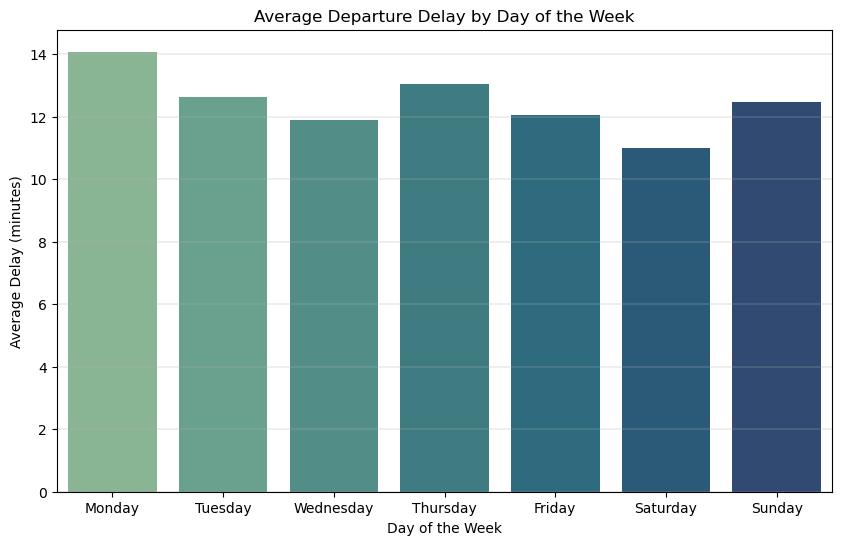

In [3]:
day_of_week_delays = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_delays.index, y=day_of_week_delays.values, palette='crest')
plt.title('Average Departure Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(axis="y", lw = 0.3)
plt.show()


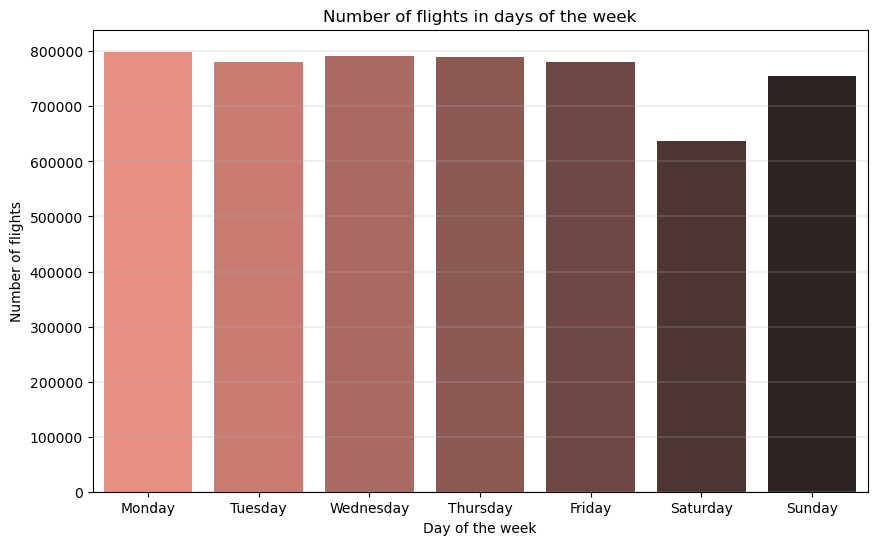

In [12]:
nflightsperday = df.groupby('DAY_OF_WEEK').apply(len)
plt.figure(figsize=(10, 6))
sns.barplot(x=nflightsperday.index, y=nflightsperday.values, palette='dark:salmon_r')
plt.title('Number of flights in days of the week')
plt.ylabel('Number of flights')
plt.xlabel('Day of the week')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(axis="y", lw = 0.3)
plt.show()

Заметим, что количество полетов и задержка рейсов действительно связаны. Чем больше рейсов в день, тем больше задержка (вданном случае это понедельник). Однако, количество рейсов почти одинаково в течение всей недели, поэтому на графиках это видно не очень явно. Чтобы решить эту проблему, нужно распределять рейсы по дням недели равномено. 

Проблема 2. Проверим, есть ли закономерность задержек рейсов с месяцами. Мое предположение заключается в том, что в какие-то месяца больше рейсов из-за туристов, а следовательно больше нагрузка на аэропорт и вероятность задержки увеличивается. 

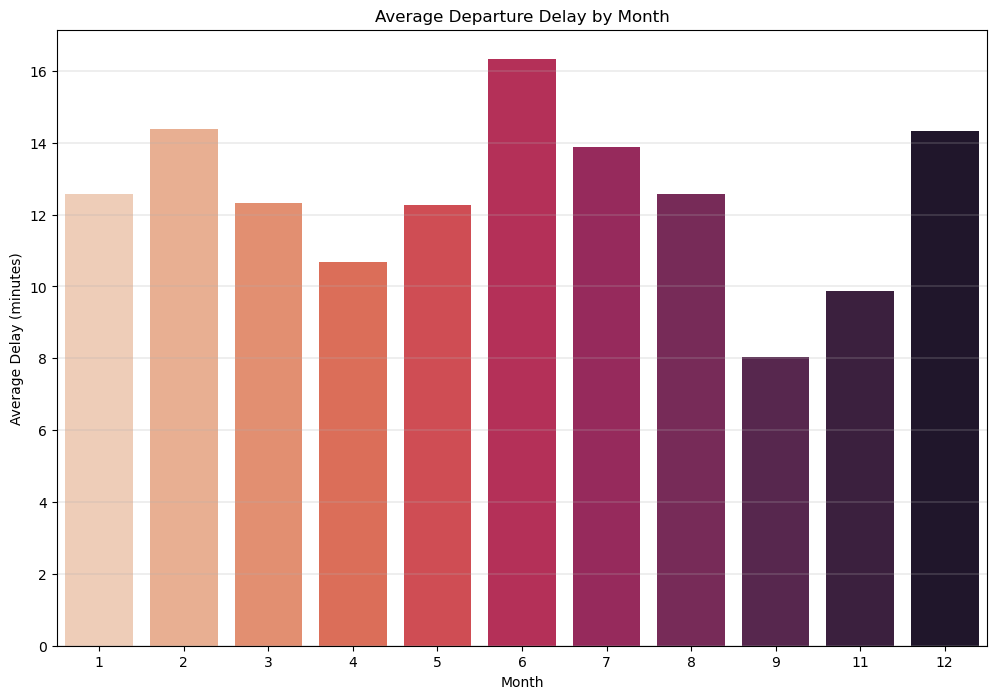

In [5]:
monthly_delays = df.groupby('MONTH')['DEPARTURE_DELAY'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_delays.index, y=monthly_delays.values, palette='rocket_r')

plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis="y", lw = 0.3)
plt.show()

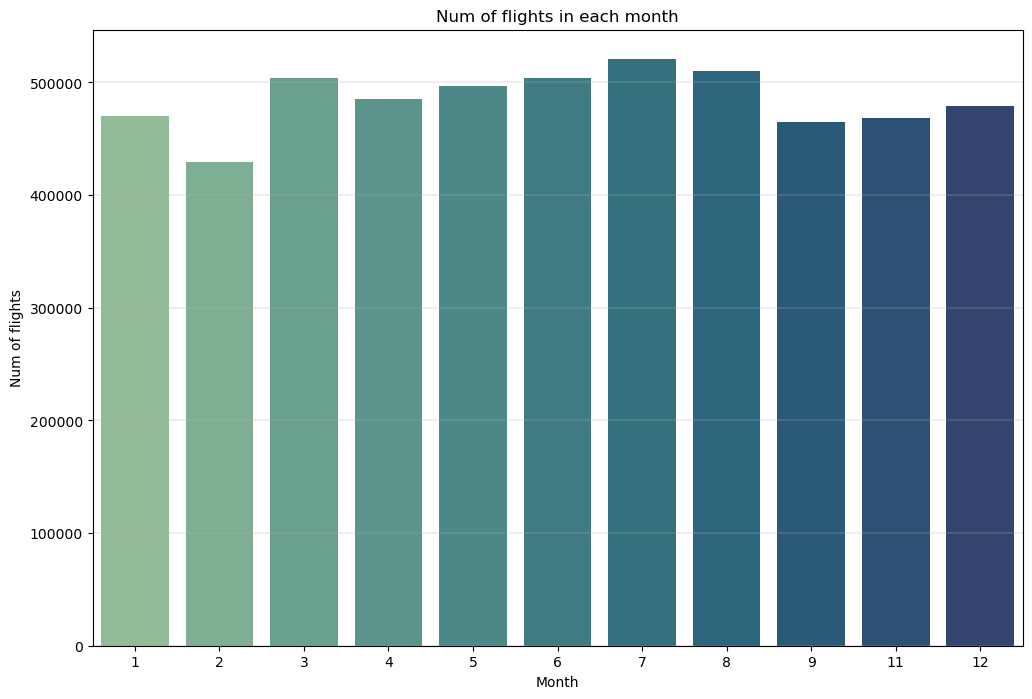

In [6]:
nflights = df.groupby('MONTH').size()
plt.figure(figsize=(12, 8))
sns.barplot(x=nflights.index, y=nflights.values, palette='crest')
plt.title('Num of flights in each month')
plt.xlabel('Month')
plt.ylabel('Num of flights')
plt.grid(axis="y", lw = 0.3)
plt.show()

Заметим, что задержек больше всего в июне. Однако, это не зависит от количества рейсов в месяце, что наглядно видно на втором графике. 

 Теперь проверим, зависят ли задержки рейсов от погоды в каждом месяце. 

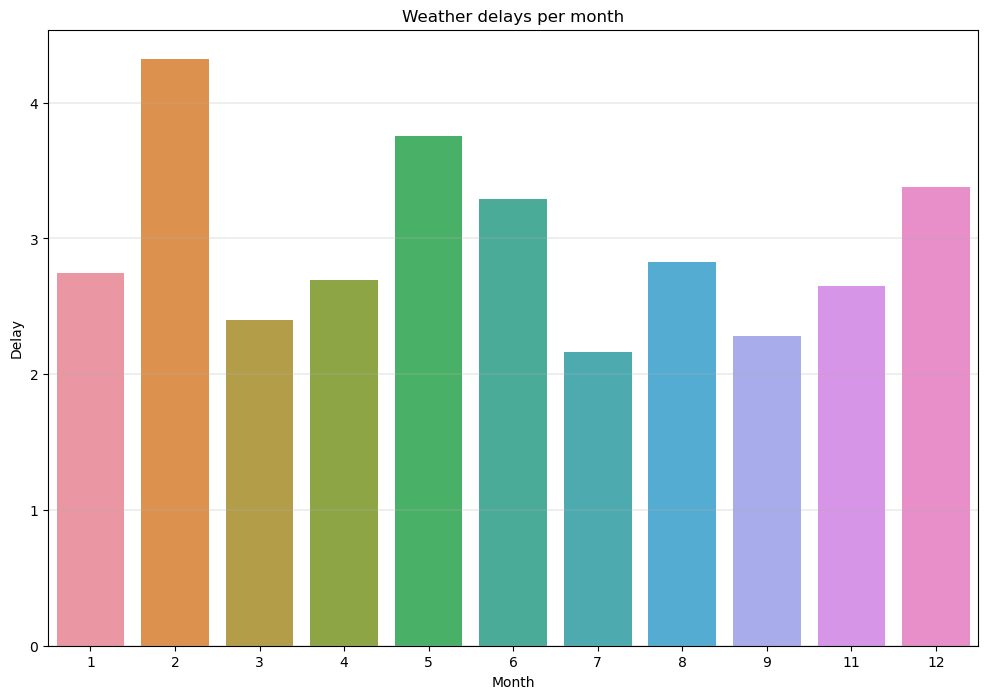

In [17]:
weather_delays = df.groupby('MONTH')['WEATHER_DELAY'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=weather_delays.index, y=weather_delays.values)
plt.title('Weather delays per month')
plt.xlabel('Month')
plt.ylabel('Delay')
plt.grid(axis="y", lw = 0.3)
plt.show()

Заметим, что из-за погодных условий задержка больше всего в феврале. Однако, обычная средняя задержка в месяц в июне. Соотвественно, погода не является основным фактором задержки. Но чтобы уменьшить количество задержек именно из-за погодных условий, можно увеличить точность долгосрочных прогнозов погоды и исходя из них составлять расписание рейсов.

Постараемся выяснить, что является истинной причиной задержек в июне. 
Найдем процентное соотношение причин возможных задержек в июне. 

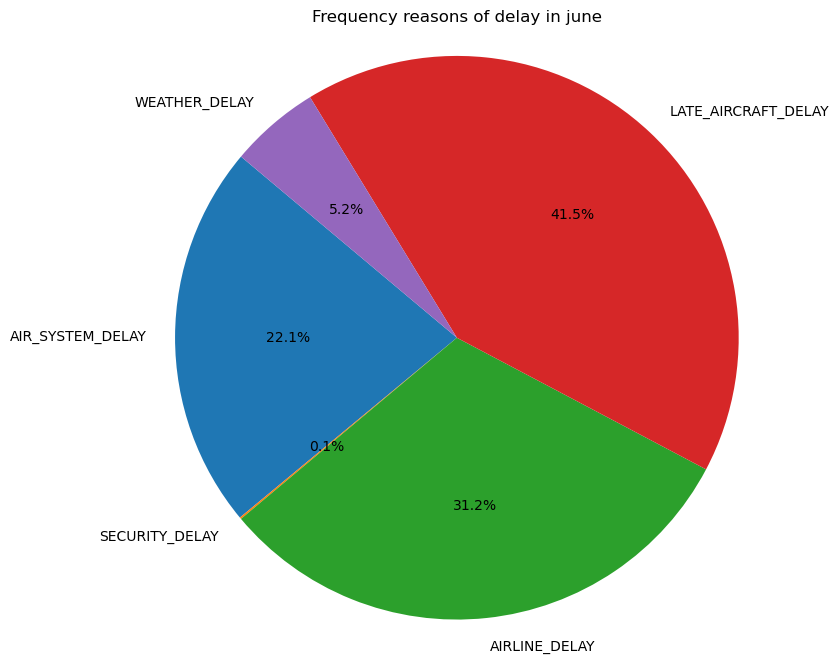

In [8]:
delay_reasons = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
june_df = df.loc[df.MONTH == 6]
frequency = june_df.loc[:, delay_reasons].sum()
plt.figure(figsize=(8, 8))
plt.pie(frequency, labels=delay_reasons, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Frequency reasons of delay in june')
plt.show()

На диаграмме наглядно показано, что наибольшее влияние на задержки рейсов в июне оказывают внутренние проблемы в авиакомпаниях, то есть из-за них самолеты вылетают позже назначенного времени. 

Проблема 3. Проверим, какой из аэропортам подвержен наиболее частым плохим погодным условиям. 

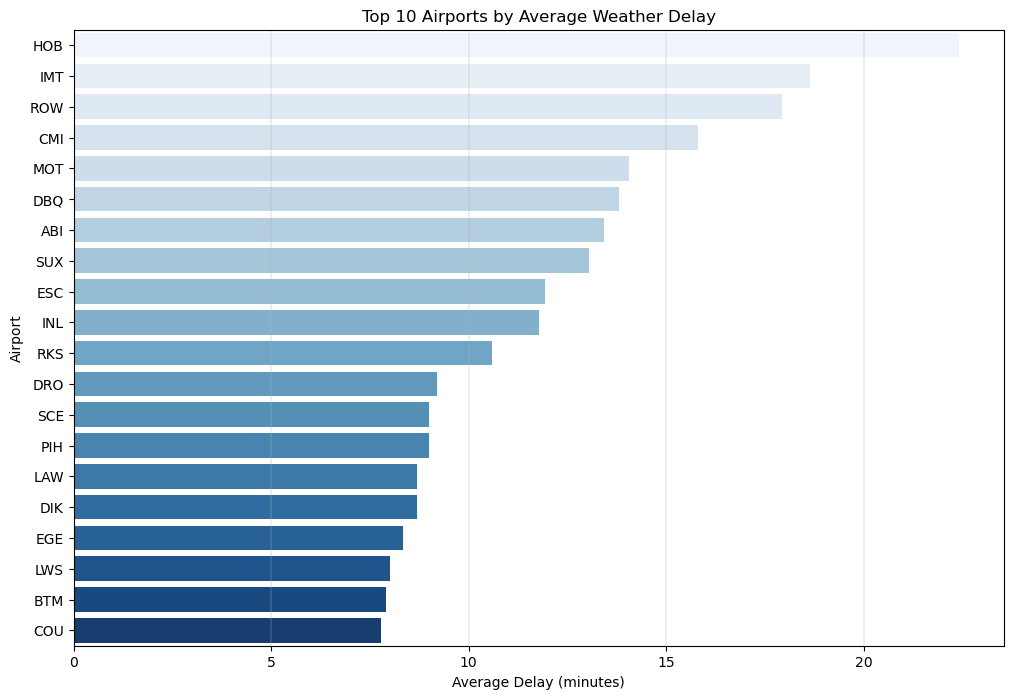

In [16]:
weather_delays = df.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=weather_delays.values, y=weather_delays.index, palette='Blues')
plt.title('Top 10 Airports by Average Weather Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airport')
plt.grid(axis="x", lw = 0.3)
plt.show()


Видим, что в аэропорту HOB наибольшая средняя задержка из-за погодных условий. Это может быть связано с местоположением аэропорта и с его размерами (он маленький). Чтобы решить эту проблему, нужно улучшать точность прогнозов погоды.

Проблема 4. Выясним, в каком аэропорту причиной задержки являюся технические проблемы в аэропорту (мало персонала, мало взлетно-посадочных полос, плохое оборудование, плохая навигация и тд)

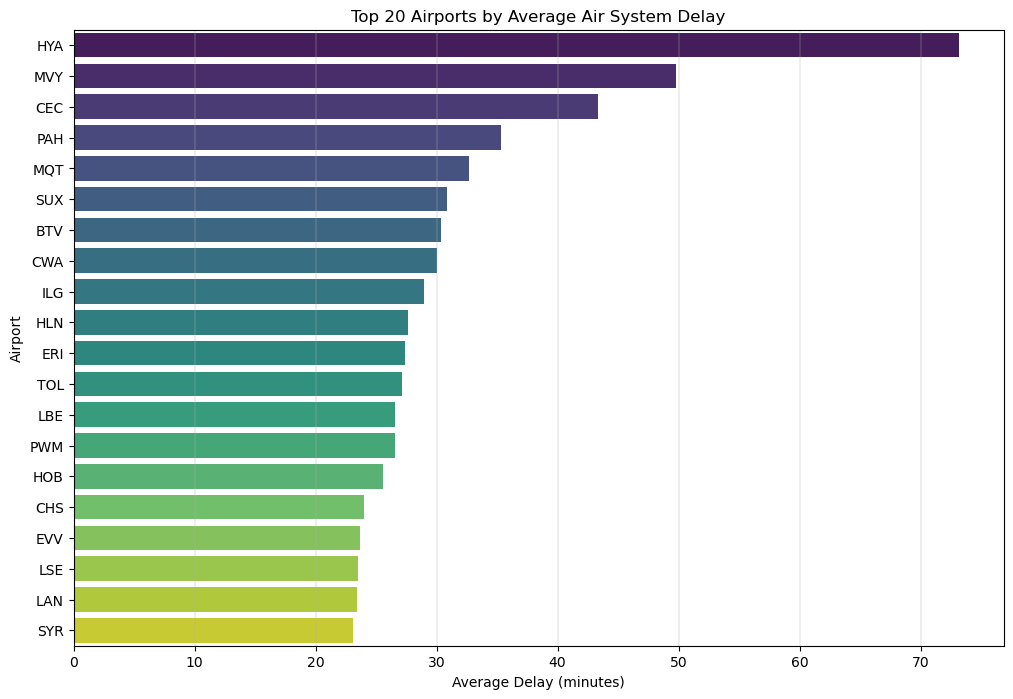

In [10]:
airport_delays = df.groupby('ORIGIN_AIRPORT')['AIR_SYSTEM_DELAY'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=airport_delays.values, y=airport_delays.index, palette='viridis')
plt.title('Top 20 Airports by Average Air System Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airport')
plt.grid(axis="x", lw = 0.3)
plt.show()


Видим, что нибольшие задержки из-за проблем в аэропорту возникают в аэропорту HYA.

Проблема 5. Рассмотрим, в каких авиакомпаниях больше всего задержек по причине опоздания в предыдущий аэропорт и по техническим причинам. 

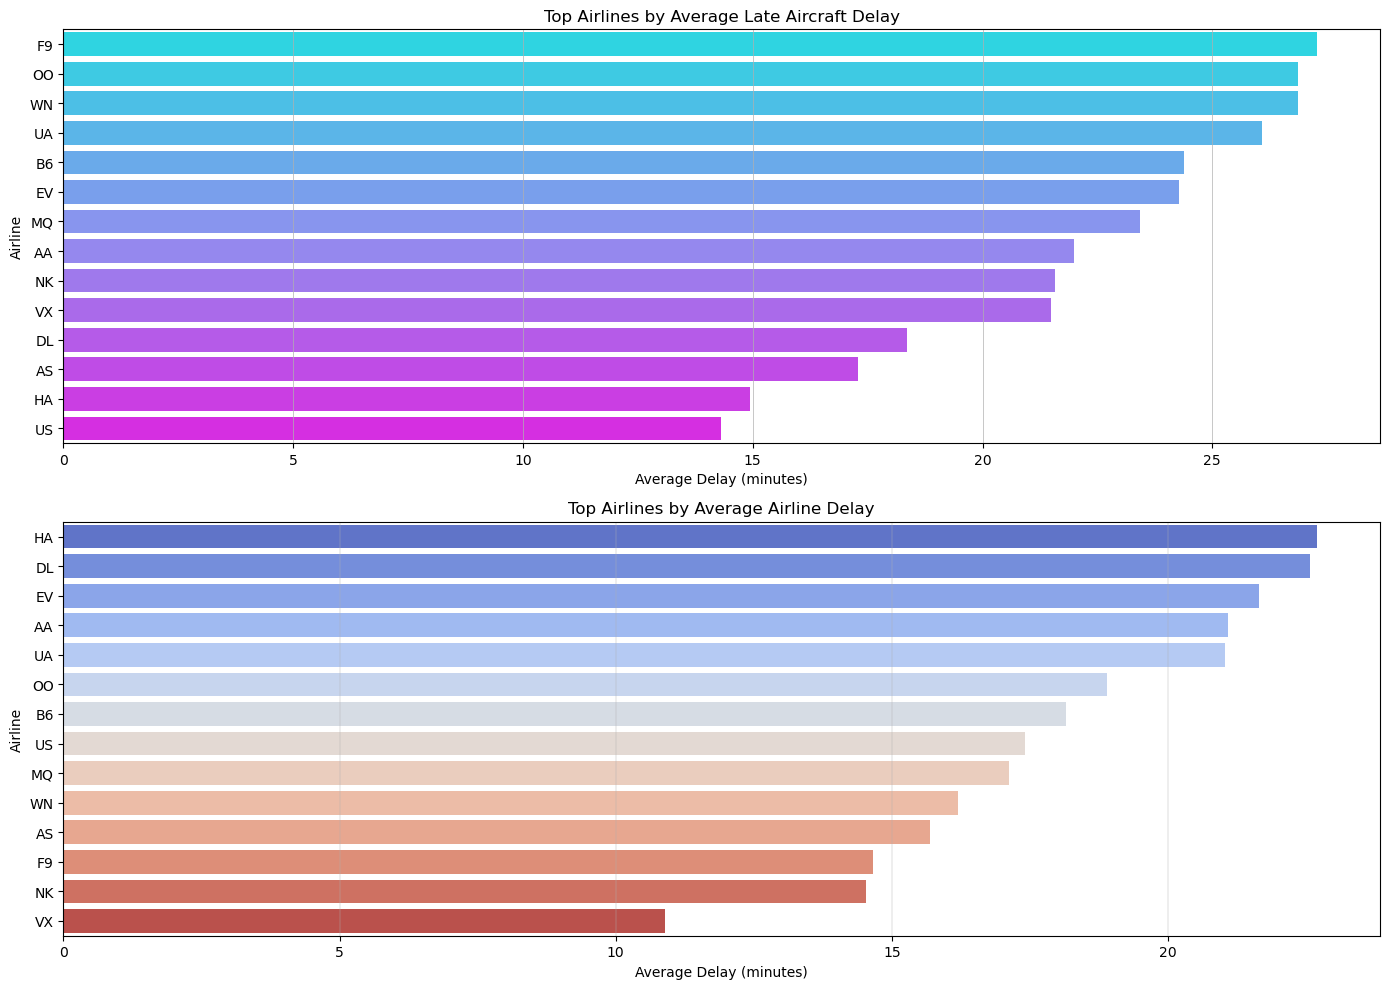

In [20]:

airline_late_delays = df.groupby('AIRLINE')['LATE_AIRCRAFT_DELAY'].mean().sort_values(ascending=False)
airline_delays = df.groupby('AIRLINE')['AIRLINE_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x=airline_late_delays.values, y=airline_late_delays.index, palette='cool')
plt.title('Top Airlines by Average Late Aircraft Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airline')
plt.grid(axis="x", lw = 0.5)

plt.subplot(2, 1, 2)
sns.barplot(x=airline_delays.values, y=airline_delays.index, palette='coolwarm')
plt.title('Top Airlines by Average Airline Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airline')
plt.grid(axis="x", lw = 0.3)
plt.tight_layout()
plt.show()


Чаще всего опаздывает с вылетом компании F9, OO, WN, и наиболее часто возникают проблемы с вылетом по техническим причинам у компаний HA и DL. Первым из этих компаний нужно улучшать навигацию, чтобы уменьшить опоздание вылетов, а вторым - улучшать свое качество, то есть повышать квалификацю сотрудников, следить за состоянием самолетов. 

Идеи и реалицазия были выполнены совместно с Мирошниченко Никитой. 